# Perform the Linear Discreminant Analysis for the dataset given

### Step 1: Find the D-dimensional mean vector for each classes (iris-data we get)
$$\begin{align*} m_i = \begin{bmatrix} \mu_{sl} (sepal-length) \\ \mu_{sw} (sepal-width) \\ \mu_{pl} (petal-length) \\ \mu_{pw} (sepal-width)\end{bmatrix}\end{align*}$$

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/Akshata Choukimath - iris.csv - Akshata Choukimath - iris.csv.csv')
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder
X = df[['sepal.length',	'sepal.width',	'petal.length',	'petal.width'	]].values
y = df['variety'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}


In [ ]:
np.set_printoptions(precision=4)
mean_vector = []
def get_meanVector(data):
    
    for cl in range(1,4):
      mean_vector.append(np.mean(X[y==cl], axis=0))
      print('Mean Vector class %s: %s\n' %(cl, mean_vector[cl-1])) 

In [ ]:
get_meanVector(df)

Mean Vector class 1: [5.006 3.428 1.462 0.246]

Mean Vector class 2: [5.936 2.77  4.26  1.326]

Mean Vector class 3: [6.588 2.974 5.552 2.026]



### Step 2: Computing the Scatter Matrices. Fist we will computer the within scatter matrix $S_w$

#### 2.1(a) Within-class scatter matrix $S_w$

$$\Large\begin{align*}S_w = \sum_{i=1}^n s_i\end{align*}$$ 
where, 

$\Large s_i = \begin{align*} \sum_{x \in D_i}^n (x - m_i)(x - m_i)^{T}\end{align*}$

#### (scatter matrix for every class)

#### $m_i$ is the mean vector

$\Large m_i = \begin{align*} \frac{1}{n_i} \sum_{x \in D_i}^n x_k\end{align*}$ 



#### Step 2.1(b) Alternatively,  we could also compute the class-covariance matrices by adding the scaling factor $\frac{1}{N-1}$ to the within-class scatter matrix, so that our equation becomes 

$\sum_i = \begin{align*}\frac{1}{N_{i}-1} \sum_{i=1}^n (x - m_i) (x - m_i)^T\end{align*}$

$S_w = \begin{align*} \sum_{i=1}^c (N_i - 1)\end{align*}\sum_i$

where $N_i$ is the sample size of the respective class

In [ ]:
S_W = np.zeros((4,4)) #zeros((number of features)) # depends on the number of class
def sw(mean_vector):
    S_W = np.zeros((4,4)) 
    for cl,mv in zip(range(1,4), mean_vector):
      class_sc_mat = np.zeros((4,4))                  # scatter matrix for every class
      for row in X[y == cl]:
        row, mv = row.reshape(4,1), mv.reshape(4,1) # make column vectors
        class_sc_mat += (row-mv).dot((row-mv).T)
      S_W = S_W + class_sc_mat                             # sum class scatter matrices
    return S_W


In [ ]:
S_W = sw(mean_vector)
print('within-class Scatter Matrix:\n', S_W)


within-class Scatter Matrix:
 [[38.9562 13.63   24.6246  5.645 ]
 [13.63   16.962   8.1208  4.8084]
 [24.6246  8.1208 27.2226  6.2718]
 [ 5.645   4.8084  6.2718  6.1566]]


#### Step 2.2 Between-class scatter matrix $S_b$. 

The between-class scatter matrix SB is computed by the following equation

$$\large\begin{align*} S_b = \sum_{i=1}^c N_i(m_i - m)(m_i - m)^T\end{align*}$$

where
m is the overall mean, and $m_i$ and $N_i$ are the sample mean and sizes of the respective classes.

In [ ]:
overall_mean = np.mean(X, axis=0)
S_b = np.zeros((4,4))  #zeros((number of features)) # depends on the number of class

def sb(mean_vector,overall_mean):
    S_b = np.zeros((4,4))
    for i,mean_vec in enumerate(mean_vector):  
      n = X[y==i+1,:].shape[0]
      mean_vec = mean_vec.reshape(4,1) # make column vector
      overall_mean = overall_mean.reshape(4,1) # make column vector
      S_b += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    return S_b

In [ ]:
S_b= sb(mean_vector,overall_mean)
print('between-class Scatter Matrix:\n', S_b)

between-class Scatter Matrix:
 [[ 63.2121 -19.9527 165.2484  71.2793]
 [-19.9527  11.3449 -57.2396 -22.9327]
 [165.2484 -57.2396 437.1028 186.774 ]
 [ 71.2793 -22.9327 186.774   80.4133]]


### Step 3: Solving the generalized eigenvalue problem for the matrix $S^{−1}_WS_b$

In [ ]:
#Find the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(np.linalg.inv(S_W).dot(S_b))

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:,i].reshape(4,1)   
    print('\nEigenvector {}: \n{}'.format(i+1, eigvec_sc.real))
    print('Eigenvalue {:}: {:.2e}'.format(i+1, eig_vals[i].real))


Eigenvector 1: 
[[-0.2087]
 [-0.3862]
 [ 0.554 ]
 [ 0.7074]]
Eigenvalue 1: 3.22e+01

Eigenvector 2: 
[[-0.0065]
 [-0.5866]
 [ 0.2526]
 [-0.7695]]
Eigenvalue 2: 2.85e-01

Eigenvector 3: 
[[-0.879 ]
 [ 0.2496]
 [ 0.2188]
 [ 0.3422]]
Eigenvalue 3: -2.09e-15

Eigenvector 4: 
[[ 0.3492]
 [-0.4242]
 [-0.4798]
 [ 0.684 ]]
Eigenvalue 4: 6.71e-15


# quick sanity check 

#A quick check that the eigenvector-eigenvalue calculation is correct and satisfy the equation:

$$Av = \lambda v$$

where 
A = $S^{−1}_WS_b$

v = Eigenvector

$\lambda$ = Eigenvalue

In [ ]:
for i in range(len(eig_vals)):
    eigv = eig_vecs[:,i].reshape(4,1)
    np.testing.assert_array_almost_equal(np.linalg.inv(S_W).dot(S_b).dot(eigv),
                                         eig_vals[i] * eigv,
                                         decimal=6, err_msg='', verbose=True)
print('ok')

ok


### Step 4: Selecting linear discriminants for the new feature subspace

#### 4.1. Sorting the eigenvectors by decreasing eigenvalues

Remember that we are not only interested in projecting the data into a subspace that gives a better class separability, but also reduces the dimensionality of the feature space. Eigenvectors with the lowest Eigenvalues will have the least information about the distribution of the data. Hence, we have to drop those. In the next code you have to rank the eigenvectors in the descending order.

In [ ]:
eig_pairs= []
def sort_eigV():
    # Make a list of (eigenvalue, eigenvector) tuples and Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)
    return eig_pairs

print('Eigenvalues in decreasing order:\n')
eig_pairs = sort_eigV()
for i in eig_pairs:
    print(i[0])

Eigenvalues in decreasing order:

32.191929198278025
0.2853910426230689
6.714007081105466e-15
2.09150323208503e-15


In [ ]:
# Let us express the Eigenvectors are percentage

print('Eigenvalue are percentage:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0]/eigv_sum).real))

Eigenvalue are percentage:

eigenvalue 1: 99.12%
eigenvalue 2: 0.88%
eigenvalue 3: 0.00%
eigenvalue 4: 0.00%


The first eigenpair is by far the most informative one, that captures most of the information present in the data

#### step 4.2. Choosing k eigenvectors with the largest eigenvalues



In [ ]:
W = np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2087 -0.0065]
 [-0.3862 -0.5866]
 [ 0.554   0.2526]
 [ 0.7074 -0.7695]]


### Step 5: Transforming the samples onto the new subspace

In the last step, we use the 4×2-dimensional matrix WW that we just computed to transform our samples onto the new subspace via the equation

$Y = X \times W$

where X is a n×d-dimensional matrix representing the n samples, and Y are the transformed n×k-dimensional samples in the new subspace

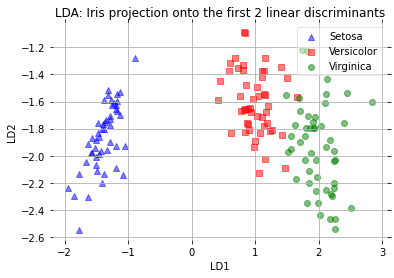

In [ ]:
X_lda = X.dot(W)
assert X_lda.shape == (150,2), "The matrix is not 150x2 dimensional."

from matplotlib import pyplot as plt

def plot_step_lda():

    ax = plt.subplot(111)
    for label,marker,color in zip(
        range(1,4),('^', 's', 'o'),('blue', 'red', 'green')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                marker=marker,
                color=color,
                alpha=0.5,
                label=label_dict[label]
                )

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Iris projection onto the first 2 linear discriminants')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

plot_step_lda()

![image.png](attachment:201dad49-01ad-488e-85f8-287012f170b6.png)

The scatter plot above represents new feature subspace that we constructed via LDA. We can see that the first linear discriminant **“LD1”** separates the classes quite nicely. However, the second discriminant, **“LD2”**, does not add much valuable information, which we already know when we looked at the ranked eigenvalues is step 4.